In [1]:
import tensorflow as tf
import string
import numpy as np
import pandas as pd

In [2]:
# retrive the dataset (song lyrics dataset on kaggle)
!wget --no-check-certificate \
    https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8 \
    -O /tmp/songdata.csv

--2023-02-18 00:07:20--  https://drive.google.com/uc?id=1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8
Resolving drive.google.com (drive.google.com)... 64.233.182.139, 64.233.182.100, 64.233.182.113, ...
Connecting to drive.google.com (drive.google.com)|64.233.182.139|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/katrdlceu3nnm4egnn4o10icte0868ki/1676678775000/11118900490791463723/*/1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8?uuid=d1bb58b8-6725-4be4-91cb-96690e5acced [following]
--2023-02-18 00:07:28--  https://doc-04-ak-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/katrdlceu3nnm4egnn4o10icte0868ki/1676678775000/11118900490791463723/*/1LiJFZd41ofrWoBtW-pMYsfz1w8Ny0Bj8?uuid=d1bb58b8-6725-4be4-91cb-96690e5acced
Resolving doc-04-ak-docs.googleusercontent.com (doc-04-ak-docs.googleusercontent.com)... 209.85.234.132, 2607:f8b0:4001:c17::84
Connecting to doc-04

In [3]:
pd.read_csv('/tmp/songdata.csv', dtype=str)

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...
...,...,...,...,...
57645,Ziggy Marley,Good Old Days,/z/ziggy+marley/good+old+days_10198588.html,Irie days come on play \nLet the angels fly l...
57646,Ziggy Marley,Hand To Mouth,/z/ziggy+marley/hand+to+mouth_20531167.html,Power to the workers \nMore power \nPower to...
57647,Zwan,Come With Me,/z/zwan/come+with+me_20148981.html,all you need \nis something i'll believe \nf...
57648,Zwan,Desire,/z/zwan/desire_20148986.html,northern star \nam i frightened \nwhere can ...


In [4]:
ds = pd.read_csv('/tmp/songdata.csv', dtype=str)[:20]

In [5]:
ds['text'][0]

"Look at her face, it's a wonderful face  \nAnd it means something special to me  \nLook at the way that she smiles when she sees me  \nHow lucky can one fellow be?  \n  \nShe's just my kind of girl, she makes me feel fine  \nWho could ever believe that she could be mine?  \nShe's just my kind of girl, without her I'm blue  \nAnd if she ever leaves me what could I do, what could I do?  \n  \nAnd when we go for a walk in the park  \nAnd she holds me and squeezes my hand  \nWe'll go on walking for hours and talking  \nAbout all the things that we plan  \n  \nShe's just my kind of girl, she makes me feel fine  \nWho could ever believe that she could be mine?  \nShe's just my kind of girl, without her I'm blue  \nAnd if she ever leaves me what could I do, what could I do?\n\n"

In [6]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [7]:
'[{}]'.format(string.punctuation)

'[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~]'

In [8]:
# pattern to match all punctuation
ds['text'].str.replace('[{}]'.format(string.punctuation), '')[0]

<ipython-input-8-a154bf50bde7>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  ds['text'].str.replace('[{}]'.format(string.punctuation), '')[0]


'Look at her face its a wonderful face  \nAnd it means something special to me  \nLook at the way that she smiles when she sees me  \nHow lucky can one fellow be  \n  \nShes just my kind of girl she makes me feel fine  \nWho could ever believe that she could be mine  \nShes just my kind of girl without her Im blue  \nAnd if she ever leaves me what could I do what could I do  \n  \nAnd when we go for a walk in the park  \nAnd she holds me and squeezes my hand  \nWell go on walking for hours and talking  \nAbout all the things that we plan  \n  \nShes just my kind of girl she makes me feel fine  \nWho could ever believe that she could be mine  \nShes just my kind of girl without her Im blue  \nAnd if she ever leaves me what could I do what could I do\n\n'

In [9]:
' sdfasd  '.rstrip()

' sdfasd'

In [10]:
def process_texts(texts):
  # regex expression
  texts = texts.str.replace('[{}]'.format(string.punctuation), '')
  texts = texts.str.lower()
  lyrics = texts.str.cat()
  corpus = lyrics.split('\n')
  for i in range(len(corpus)):
    corpus[i] = corpus[i].rstrip()
  corpus = [l for l in corpus if l != '']

  return corpus

In [11]:
corpus = process_texts(ds['text'])

<ipython-input-10-053bcceb6e83>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  texts = texts.str.replace('[{}]'.format(string.punctuation), '')


In [12]:
corpus

['look at her face its a wonderful face',
 'and it means something special to me',
 'look at the way that she smiles when she sees me',
 'how lucky can one fellow be',
 'shes just my kind of girl she makes me feel fine',
 'who could ever believe that she could be mine',
 'shes just my kind of girl without her im blue',
 'and if she ever leaves me what could i do what could i do',
 'and when we go for a walk in the park',
 'and she holds me and squeezes my hand',
 'well go on walking for hours and talking',
 'about all the things that we plan',
 'shes just my kind of girl she makes me feel fine',
 'who could ever believe that she could be mine',
 'shes just my kind of girl without her im blue',
 'and if she ever leaves me what could i do what could i do',
 'take it easy with me please',
 'touch me gently like a summer evening breeze',
 'take your time make it slow',
 'andante andante',
 'just let the feeling grow',
 'make your fingers soft and light',
 'let your body be the velvet of th

In [13]:
max_sequence_len = max([len(sentence) for sentence in corpus])
max_sequence_len

69

In [14]:
# train the tokenizer
tokenizer = tf.keras.layers.TextVectorization(output_sequence_length=max_sequence_len, output_mode='int')
tokenizer.adapt(corpus)

In [15]:
vocab = tokenizer.get_vocabulary(include_special_tokens=True)

In [49]:
len(vocab)

837

In [16]:
total = len(vocab)

In [17]:
sequences = []
for line in corpus:
  encoded = tokenizer(line)

  for i in range(1, len(encoded)):
    n_gram_sequence = encoded[:i+1]
    sequences.append(n_gram_sequence)

In [18]:
sequences[0][-1].numpy()

145

In [19]:
input_sequences = []
labels = []
for sequence in sequences:
  input_sequences.append(sequence[:-1].numpy())
  labels.append(sequence[-1].numpy())

In [33]:
labels

[145,
 304,
 177,
 28,
 5,
 475,
 177,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10,
 412,
 186,
 540,
 8,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 145,
 6,
 85,
 13,
 98,
 550,
 34,
 98,
 390,
 7,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 652,
 19,
 110,
 734,
 22,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,

In [20]:
input_sequences = np.array(tf.keras.preprocessing.sequence.pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [21]:
labels = tf.keras.utils.to_categorical(labels, num_classes=len(vocab) + 1)

In [22]:
labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
print(sequences[5])
print(input_sequences[5])
print(labels[5])

tf.Tensor([132 145 304 177  28   5 475], shape=(7,), dtype=int64)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0 132 145 304 177  28   5]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(total + 1, 64, input_length=max_sequence_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
    tf.keras.layers.Dense(total + 1, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(input_sequences, labels, epochs=50, verbose=1)

Epoch 1/50
1492/1492 [==============================] - 27s 16ms/step - loss: 0.7848 - accuracy: 0.9135
Epoch 2/50
1492/1492 [==============================] - 17s 12ms/step - loss: 0.5033 - accuracy: 0.9169
Epoch 3/50
1492/1492 [==============================] - 18s 12ms/step - loss: 0.4858 - accuracy: 0.9177
Epoch 4/50
1492/1492 [==============================] - 21s 14ms/step - loss: 0.4668 - accuracy: 0.9186
Epoch 5/50
1492/1492 [==============================] - 22s 15ms/step - loss: 0.4492 - accuracy: 0.9207
Epoch 6/50
1492/1492 [==============================] - 19s 13ms/step - loss: 0.4324 - accuracy: 0.9217
Epoch 7/50
1492/1492 [==============================] - 17s 11ms/step - loss: 0.4171 - accuracy: 0.9223
Epoch 8/50
1492/1492 [==============================] - 17s 11ms/step - loss: 0.4025 - accuracy: 0.9242
Epoch 9/50
1492/1492 [==============================] - 17s 12ms/step - loss: 0.3878 - accuracy: 0.9252
Epoch 10/50
1492/1492 [==============================] - 17s 11m

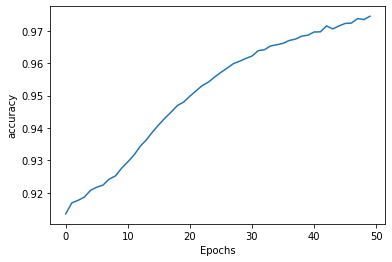

In [26]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')

In [30]:
seed_text = "The squirrel is showering"
token_list = tokenizer(seed_text)
token_list = tf.keras.preprocessing.sequence.pad_sequences([token_list], maxlen=max_sequence_len, padding='pre')

In [34]:
model.predict(token_list)

1/1 [==============================] - 0s 65ms/step


array([[9.99994278e-01, 1.80860993e-10, 6.74058316e-14, 7.81586222e-13,
        6.34132107e-07, 1.56229060e-16, 3.56874664e-12, 1.96682462e-11,
        7.85153609e-11, 1.26170190e-12, 1.10889830e-11, 4.02187152e-06,
        2.58798788e-10, 6.09770234e-09, 1.23271207e-12, 5.51434498e-09,
        8.09548073e-09, 2.53669958e-12, 3.06984160e-11, 3.67915247e-12,
        3.52801806e-08, 9.93682221e-08, 3.16409490e-26, 1.62417128e-17,
        7.67288213e-07, 4.98677879e-12, 3.08889795e-13, 3.48988353e-15,
        2.63874304e-11, 2.13681927e-28, 8.77346737e-11, 1.19688851e-12,
        1.58480032e-12, 1.79052292e-12, 5.74114020e-11, 4.09483806e-15,
        2.46878258e-18, 9.24915992e-27, 3.15713666e-12, 3.91143338e-17,
        1.77412777e-15, 2.35823535e-12, 2.96515681e-25, 8.54464663e-35,
        7.31210086e-15, 2.81058450e-29, 1.73677635e-11, 3.45405660e-08,
        3.62049044e-19, 4.79872286e-15, 2.78331842e-18, 2.62331749e-18,
        2.07398501e-10, 1.58976359e-18, 2.78218176e-26, 2.009412

In [35]:
predicted = np.argmax(model.predict(token_list), axis=-1)

1/1 [==============================] - 0s 32ms/step


In [36]:
print(predicted)

[0]


In [40]:
vocab[3]

'i'

In [49]:
seed_text = "im feeling chills"
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer(seed_text)
 
	token_list = tf.keras.preprocessing.sequence.pad_sequences(token_list, maxlen=max_sequence_len, padding='pre')
	predicted = np.argmax(model.predict(token_list), axis=-1)
	output_word = vocab[predicted + 1]
	seed_text += " " + output_word
print(seed_text)

IndentationError: ignored